# Pooling layers

In [1]:
from chapter import *
from torchvision.io import read_image
import torchvision.transforms.functional as fn

cat = DATASET_DIR / "shorty.png"
X = read_image(str(cat)).unsqueeze(0)[:, :3, :, :]
X = fn.resize(X, size=(128, 128)) / 255.

Pooling layers downsample an input by performing nonparametric operations that slide across the input like convolutional layers. This can be interpreted as decreasing the resolution of feature maps (sort of zooming out) that deeper layers will work on. Pooling is applied to each channel separately, so that the number of output channels is maintained. This makes sense since we want only to compress the original input without affecting its semantic structure.

```{figure} ../../../img/pooling-cs231n.png
---
width: 300px
align: center
---

Pooling layer downsamples the volume spatially independently in each channel. The input tensor of size 224 × 224 × 64 is pooled with filter size 2 and stride 2 into output volume of size 112 × 112 × 64. [Source](https://cs231n.github.io/convolutional-networks/)
```

The **receptive field** of a unit is the union of all units that influence its value during forward pass ({numref}`receptive_field`). In particular, units corresponding to each class label should ideally have a receptive field that includes the entire (or at least almost all) input pixels. Otherwise the network will have blind spots in its input. A way to exponentially increase receptive field, and also make the network more robust to noise, is by **downsampling**. Here we do it along the spatial dimensions.

<br>

```{figure} ../../../img/receptive_field.png
---
name: receptive_field
width: 28em
align: center
---
Fig 14.2 in {cite}`geron2019hands-on`.
Receptive field of a pixel in a convolutional network. For an output pixel in an intermediate layer, whose are inputs are formed from stacked convolutions, its larger receptive field indicates that it processes hierarchical features of the original image.
```

## Max pooling

Max pooling layers make the network insensitive to noise or fine-grained details in the input at the cost of some information loss. It can be interpreted as a form of competition between neurons since the gradient only flows through the activated neuron. A soft alternative is **average pooling**. Commonly used parameters are `k=2, s=2` where pooling regions do not overlap, and `k=3, s=2` where some overlap is allowed.

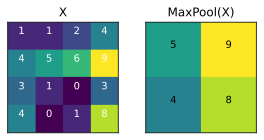

In [2]:
x = torch.tensor([
    [ 1, 1, 2, 4],
    [ 4, 5, 6, 9],
    [ 3, 1, 0, 3],
    [ 4, 0, 1, 8]]
)[None, None, :, :].float()

pool = nn.MaxPool2d(kernel_size=2, stride=2)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(4, 2))
ax[0].set_title("X")
ax[0].imshow(x.numpy()[0, 0, :, :], cmap="viridis", vmin=0)
ax[0].set_xticks([])
ax[0].set_yticks([])
for i in range(4):
    for j in range(4):
        ax[0].text(j, i, int(x[0, 0, i, j].numpy()), ha="center", va="bottom", color="white")

ax[1].set_title("MaxPool(X)")
ax[1].imshow(pool(x)[0].detach().permute(1, 2, 0), cmap="viridis", vmin=0)
ax[1].set_xticks([])
ax[1].set_yticks([])
for i in range(2):
    for j in range(2):
        ax[1].text(j, i, int(pool(x)[0, 0, i, j].numpy()), ha="center", va="bottom", color="black")

fig.tight_layout()

Using a large kernel relative to the input can result in information loss:

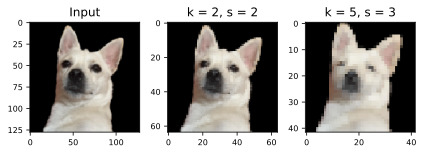

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(6, 3))
ax[0].imshow(X[0, :, :, :].permute(1, 2, 0))
ax[0].set_title("Input")
ax[1].imshow(nn.MaxPool2d(kernel_size=2, stride=2)(X)[0, :, :, :].permute(1, 2, 0))
ax[1].set_title("k = 2, s = 2")
ax[2].imshow(nn.MaxPool2d(kernel_size=5, stride=3)(X)[0, :, :, :].permute(1, 2, 0))
ax[2].set_title("k = 5, s = 3")
for i in range(3):
    ax[i].tick_params(axis="both", which="major", labelsize=8)

fig.tight_layout();

## Global pooling

Global pooling follows that intuition that we want to detect some patterns, but we do not care too much where exactly these patterns are ({numref}`03-pooling-text`). A **global average pooling** (GAP) layer will also be used later for an image classification task allowing the network to learn one feature detector for each output channel.

```{figure} ../../../img/nn/03-pooling-text.png
---
width: 740px
name: 03-pooling-text
align: center
---

A typical convolutional model for texts consist of conv + pooling blocks. Here convolutions are applicable when we want to classify text using the presence of local features (e.g. certain phrases). [Source](https://lena-voita.github.io/nlp_course/models/convolutional.html)
```